### Imports

In [3]:
from sentence_transformers import SentenceTransformer

c:\Users\maria\anaconda3\envs\embed\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sc

# Special imports for plots
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

### Creating the Dataframe and Loading in the Model

In [6]:
model = SentenceTransformer('mixedbread-ai/mxbai-embed-large-v1')

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

c:\Users\maria\anaconda3\envs\embed\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\maria\.cache\huggingface\hub\models--mixedbread-ai--mxbai-embed-large-v1. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/171 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/113k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/677 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/670M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/297 [00:00<?, ?B/s]

### Embedding the text

In [ ]:
'''
df = pd.read_csv("motivation_results.csv")
embedding = model.encode(df["Response"])
embedding = np.array(embedding)
np.save('embeddings.npy', embedding)
'''

In [12]:
df = pd.read_csv("Data/motivation_results.csv")
embedding = np.load('embeddings.npy')
embedding = embedding.tolist()
df.insert(1,"embedding",embedding)

In [14]:
rows_remove = [177, 325, 374, 499, 665, 1434, 1768, 2058, 2087]
for k in rows_remove:
    df = df.drop(k)
df = df.reset_index(drop=True)

In [15]:
df.head()

,Response,embedding,Codes,physiological/emotional,Vicarious,Mastery,Social Persuasion,Utility Value,Media Triggered,Event Triggered,Intrinsic Value,Intrinsic Value (Astronomy),Attainment Value,Intrinsic Social,Cost (Emotional),Cost (Outside Effort),Cost (Loss),Cost (Task Effort),Unnamed: 17
0,From the very beginning I had a love for math ...,"[0.38071826100349426, -0.26727038621902466, -0...","Intrinsic Value, Physiological/Emotional, Cost...",1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,NaN
1,I first took a physics class in my junior year...,"[0.05751581862568855, -0.43942421674728394, -0...","Vicarious Experience, Intrinsic Value, Cost (L...",0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,NaN
2,I first considered physics as a major when I t...,"[0.5500103831291199, -0.7009711265563965, -0.0...","Physiological/Emotional, Social Persuasion, Ma...",1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,NaN
3,"Ever since I was a freshman in high school"","" ...","[-0.296572208404541, -0.2284899652004242, -0.2...","Vicarious Experience, Social Persuasion, Intri...",0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,NaN
4,I had always wanted to become an astronaut as ...,"[-0.2757393419742584, -0.064843088388443, -0.1...","Utility Value, Intrinsic Value (Astronomy)",0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,NaN


In [17]:
text_embeddings = np.vstack(df["embedding"].values)
print(text_embeddings.shape)

(2116, 1024)


### Defining the centroids

In [18]:
centroid_indices = [[1503],
                    [1548],
                    [1236, 671, 858, 2057, 1432, 622, 1649, 1471, 770],
                    [1425, 1873, 1397, 150, 1768, 1058, 335, 1192, 20],
                    [377, 1118, 871, 26, 466, 1765, 1970, 1721, 1269],
                    [24, 41, 518, 646, 758, 920, 1009, 2000, 2079], 
                    [94, 1106, 31, 1686, 1896, 270, 2060, 934, 1001], 
                    [96, 487, 1338, 1354, 2049], 
                    [960, 573, 1367, 1611, 600, 1315, 228, 276, 928], 
                    [705, 281, 1641, 887, 346, 1510, 471, 196, 1012],
                    [1545, 237, 109, 1622, 1208, 249, 2027, 695, 804]]
category_names = ["Attainment Value", "Cost", "Intrinsic Value", "Media Triggered Intrinsic Value", 
                  "Event Triggered Intrinsic Value", "Intrinsic Value (Social)", "Utility Value", "Mastery Experience", 
                  "Physiological or Emotional Arousal", "Social Persuasion", "Vicarious Experience"]

Additional centroids for Attainment value, Cost and Mastery experience:

In [46]:
add_centr = [["I finally found my calling.", "I feel like I have always loved science!", "I've always been a scientist", "I absolutely loved the class"","" and the material seemed to work well with how I thought. I became to think of myself as a physicist.", 
              "Physics makes sense to me and helps explain our world and I enjoy being able to explain that to others.", 
              "Science has always been something I was very passionate about and from a young age I wanted to be a scientist and when I took physics in high school I knew that it was what I wanted to do", 
              "When I was a child"","" I told my father that I wanted to be a scientists.", "In addition"","" it was in this class that I experienced my fist science fair"","" and that was the first time that I ever felt the confidence to pursue a career as a physicist."],
              ["In college I initially had doubts about continuing in physics"","" butby changing the pace of my classes I decided to con- tinue studying physics. I am now in my junior year of my undergraduate and in spite of occasional lapses in self-confidence"","" I have decided to stick with physics for good.", 
               "Over the next couple of years, I continued maths class with an excellent teacher in a small `gifted and talented` group of eight, which really pushed me mathematically, I struggled a lot with the rigorous curriculum and being in a class of high-achievers, but I believe it taught me to persevere with maths and problem solving.", 
               "In this course I was constantly challenged and stumped by complicated subjects and problems but with my class was able to tackle each issue head on", 
               "Looking back, it was very much the gender dynamic that initially kept me from acknowledging my interest.", 
               "However, after my experiences in physics I have decided I would much rather pursue a career in software development. Job security, income, and the ability to choose where I live rather than have my job dictate where I can live are well worth that exchange. I have also found that individuals in physics do not seem to have the same collaborative energy as computer scientists and I would like to live to see the effect my life`s work has.", 
               "Unfortunately, I was met with backlash and harsh criticism. Not a lot of people were convinced that I liked physics or even that I was good at physics. Being a black, Nigerian American female in physics is a rarity, so I was met with skepticism about my skills and knowledge. Physics is a tricky subject, so when I failed at times, I would sometimes give into my insecurities and think I was not good enough.", 
               "As I went through high school I was told I would be better suited in medicine or biology, it was only men in my high school who were interested in physics.", 
               "Growing up, I always said that I wanted to become an astronaut but the reactions of the people around me to my career choice was discouraging and I was told to aim for something more , 'realistic'."],
               ["I`ve always been good in math and also drawn to the sciences"","" and one day it just clicked", "I excelled in physics and chemistry"","" but it wasn`t until my senior year that I attended a workshop at my university`s physics department", 
                "I was always interested in math and science growing up"","" and excelled in all my classes"","" but particularly math. Once coming to high school"","" I started taking AP math and science classes and doing well in them"","" knowing I would end up in a math or science field.", 
                "I really loved my physics class in high school because it made a lot of sense about the world and I was good at it. In college"","" I began doing research in astrophysics and the support and success I have had in my research has really encouraged me to stick with it."]]

In [75]:
def extra_embedding(text): 
    embedding_ex = model.encode(text)
    embedding_ex = embedding_ex.tolist()

    return embedding_ex

In [88]:
# Map to extra embeddings for specific category indices
extra_embeddings_map = {0: add_centr[0], 1: add_centr[1], 7: add_centr[2]}

centroid_embeddings = []
for i, centroid in enumerate(centroid_indices):
    category_embeddings = []

    # Check if the current index has an extra embedding to be prepended
    if i in extra_embeddings_map:
        extra_embeddings = extra_embedding(extra_embeddings_map[i])
        category_embeddings.extend(extra_embeddings)

    category_embeddings.extend(df.embedding[index] for index in centroid)

    category_embedding_centroid = np.mean(category_embeddings, axis=0)
    centroid_embeddings.append(category_embedding_centroid)

centroid_embeddings = np.array(centroid_embeddings)

In [92]:
print(np.shape(centroid_embeddings))

(11, 1024)


### Scoring

In [93]:
def embedding_score(text_embeddings, centroid_embeddings, alpha, metric, scaling, rounding=False):

    # Check that the input is valid
    assert scaling in ["exponential", "power"]
    assert metric in ["cosine", "euclidean", "cityblock"]

    # Calculating distances using scipy.spatial.distance.cdist function
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.d.istance.cdist.html
    distances = sc.spatial.distance.cdist(text_embeddings, centroid_embeddings, metric=metric)

    # Scale and invert the distances according to the specified scaling
    if scaling == "exponential":
        score = 1/np.exp(alpha*distances)
    if scaling == "power":
        score = 1/(distances**alpha)

    # L1 norm the scores to get a probability distribution
    score /= score.sum(axis=1)[:,None]

    # Round the scores to 2 decimals if specified
    if rounding:
        # Set all values below 0.01 to 0
        score[score <=0.01] = 0
        score /= score.sum(axis=1)[:,None]

    return score

#### Scoring with $\alpha = 1$

In [94]:
texts = text_embeddings   # the matrix of all the embeddings from earlier
centroids = centroid_embeddings   # the embedded centroids we made in part 3

alpha = 1    # an initial alpha value
metric = 'cosine'   # Cosine Similarity
scaling = 'power'   # Power scaling

scores = embedding_score(texts, centroids, alpha, metric, scaling)

print(scores[:5])

[[0.07454115 0.094231   0.12133666 0.07959364 0.08551368 0.07580598
  0.07902852 0.10767    0.10916176 0.07652343 0.09659419]
 [0.06620854 0.09204389 0.11957692 0.0720614  0.08543088 0.07961994
  0.08567424 0.10528466 0.10397755 0.08006028 0.11006171]
 [0.06166881 0.1003502  0.10692029 0.06242962 0.08057295 0.08599831
  0.08184768 0.1017396  0.10338795 0.09042932 0.12465528]
 [0.0856393  0.08509856 0.13123501 0.09096261 0.08212567 0.05884545
  0.07516857 0.10518584 0.10052889 0.07556741 0.10964269]
 [0.10077606 0.09149013 0.11190152 0.09712082 0.09482956 0.06568048
  0.10161618 0.09886124 0.08331416 0.07381143 0.08059844]]


#### Scoring with $\alpha = 50$

In [ ]:
texts = text_embeddings   # the matrix of all the embeddings from earlier
centroids = centroid_embeddings   # the embedded centroids we made in part 3

alpha = 50    # an initial alpha value
metric = 'cosine'   # Cosine Similarity
scaling = 'power'   # Power scaling

In [ ]:
scores = embedding_score(texts, centroids, alpha, metric, scaling)

print(np.shape(scores))

### Assigning the categories

We take the scores given, then use this to assign the "most likely" category for each value.

#### $\alpha=15$

In [ ]:
scores = embedding_score(texts, centroids, alpha=150, metric='cosine', scaling='power')

In [102]:
# Define your threshold
threshold = 0.0909

scores_binary = np.where(scores > threshold, 0, 1)

In [103]:
scores_binary

array([[1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 1, 1],
       [1, 1, 0, ..., 1, 1, 1],
       [1, 1, 0, ..., 0, 1, 1]])

In [104]:
np.save('scores.npy', scores_binary)

### Heatmap

In [99]:
# @title Plotting function for heatmap
def plot_heatmap(indices, alpha, metric, scaling, category_names):
    import string
    alphabet = list(string.ascii_lowercase)

    red_colors = [(1, 0.95, 0.95), (1, 0.9, 0.9), (1, 0.4, 0.5),
                  (0.95, 0.3, 0.4), (0.95, 0.2, 0.3), (0.7, 0.1, 0.2),
                   (0.5, 0.08, 0.15)]
    red_cmap = mcolors.LinearSegmentedColormap.from_list("custom", red_colors, N=256)

    # Plot heatmaps for all five articles as subplots in one figure
    fig, ax = plt.subplots(len(indices),1, figsize=(10, len(indices)+2))
    embedding_scores = embedding_score(text_embeddings, centroid_embeddings, alpha, metric, scaling)

    # Create each of the subplot heatmaps
    for i, index in enumerate(indices):
        scores = np.vstack(embedding_scores[index, :]).T
        gx = sns.heatmap(scores, cmap=red_cmap, annot=True, yticklabels=['Score'],
                         xticklabels=range(1,len(category_names)+1), vmin=0, vmax=1, ax=ax[i], cbar=False, fmt='.2f')

        # extra formating of the plot
        gx.set_yticklabels(gx.get_yticklabels(), fontsize=9)
        ax[i].text(-0.3, -0.2, f"({alphabet[i]})", fontsize=11, fontweight='bold')

        # This line might need changes in order to be more usefull
        #ax[i].set_title(f'{df["Response"][index]}', fontweight='bold', fontsize=10)


    legend_patches = [mpatches.Patch(color='white', label=(f'{i+1}: {category}')) for i, category in enumerate(category_names)]
    fig.legend(handles=legend_patches, bbox_to_anchor=(1.05, 0.95), loc='upper left', frameon = False, ncol=1, prop={'size': 10, 'weight':'bold'})
    fig.tight_layout(w_pad=2, h_pad=2)
    plt.show()


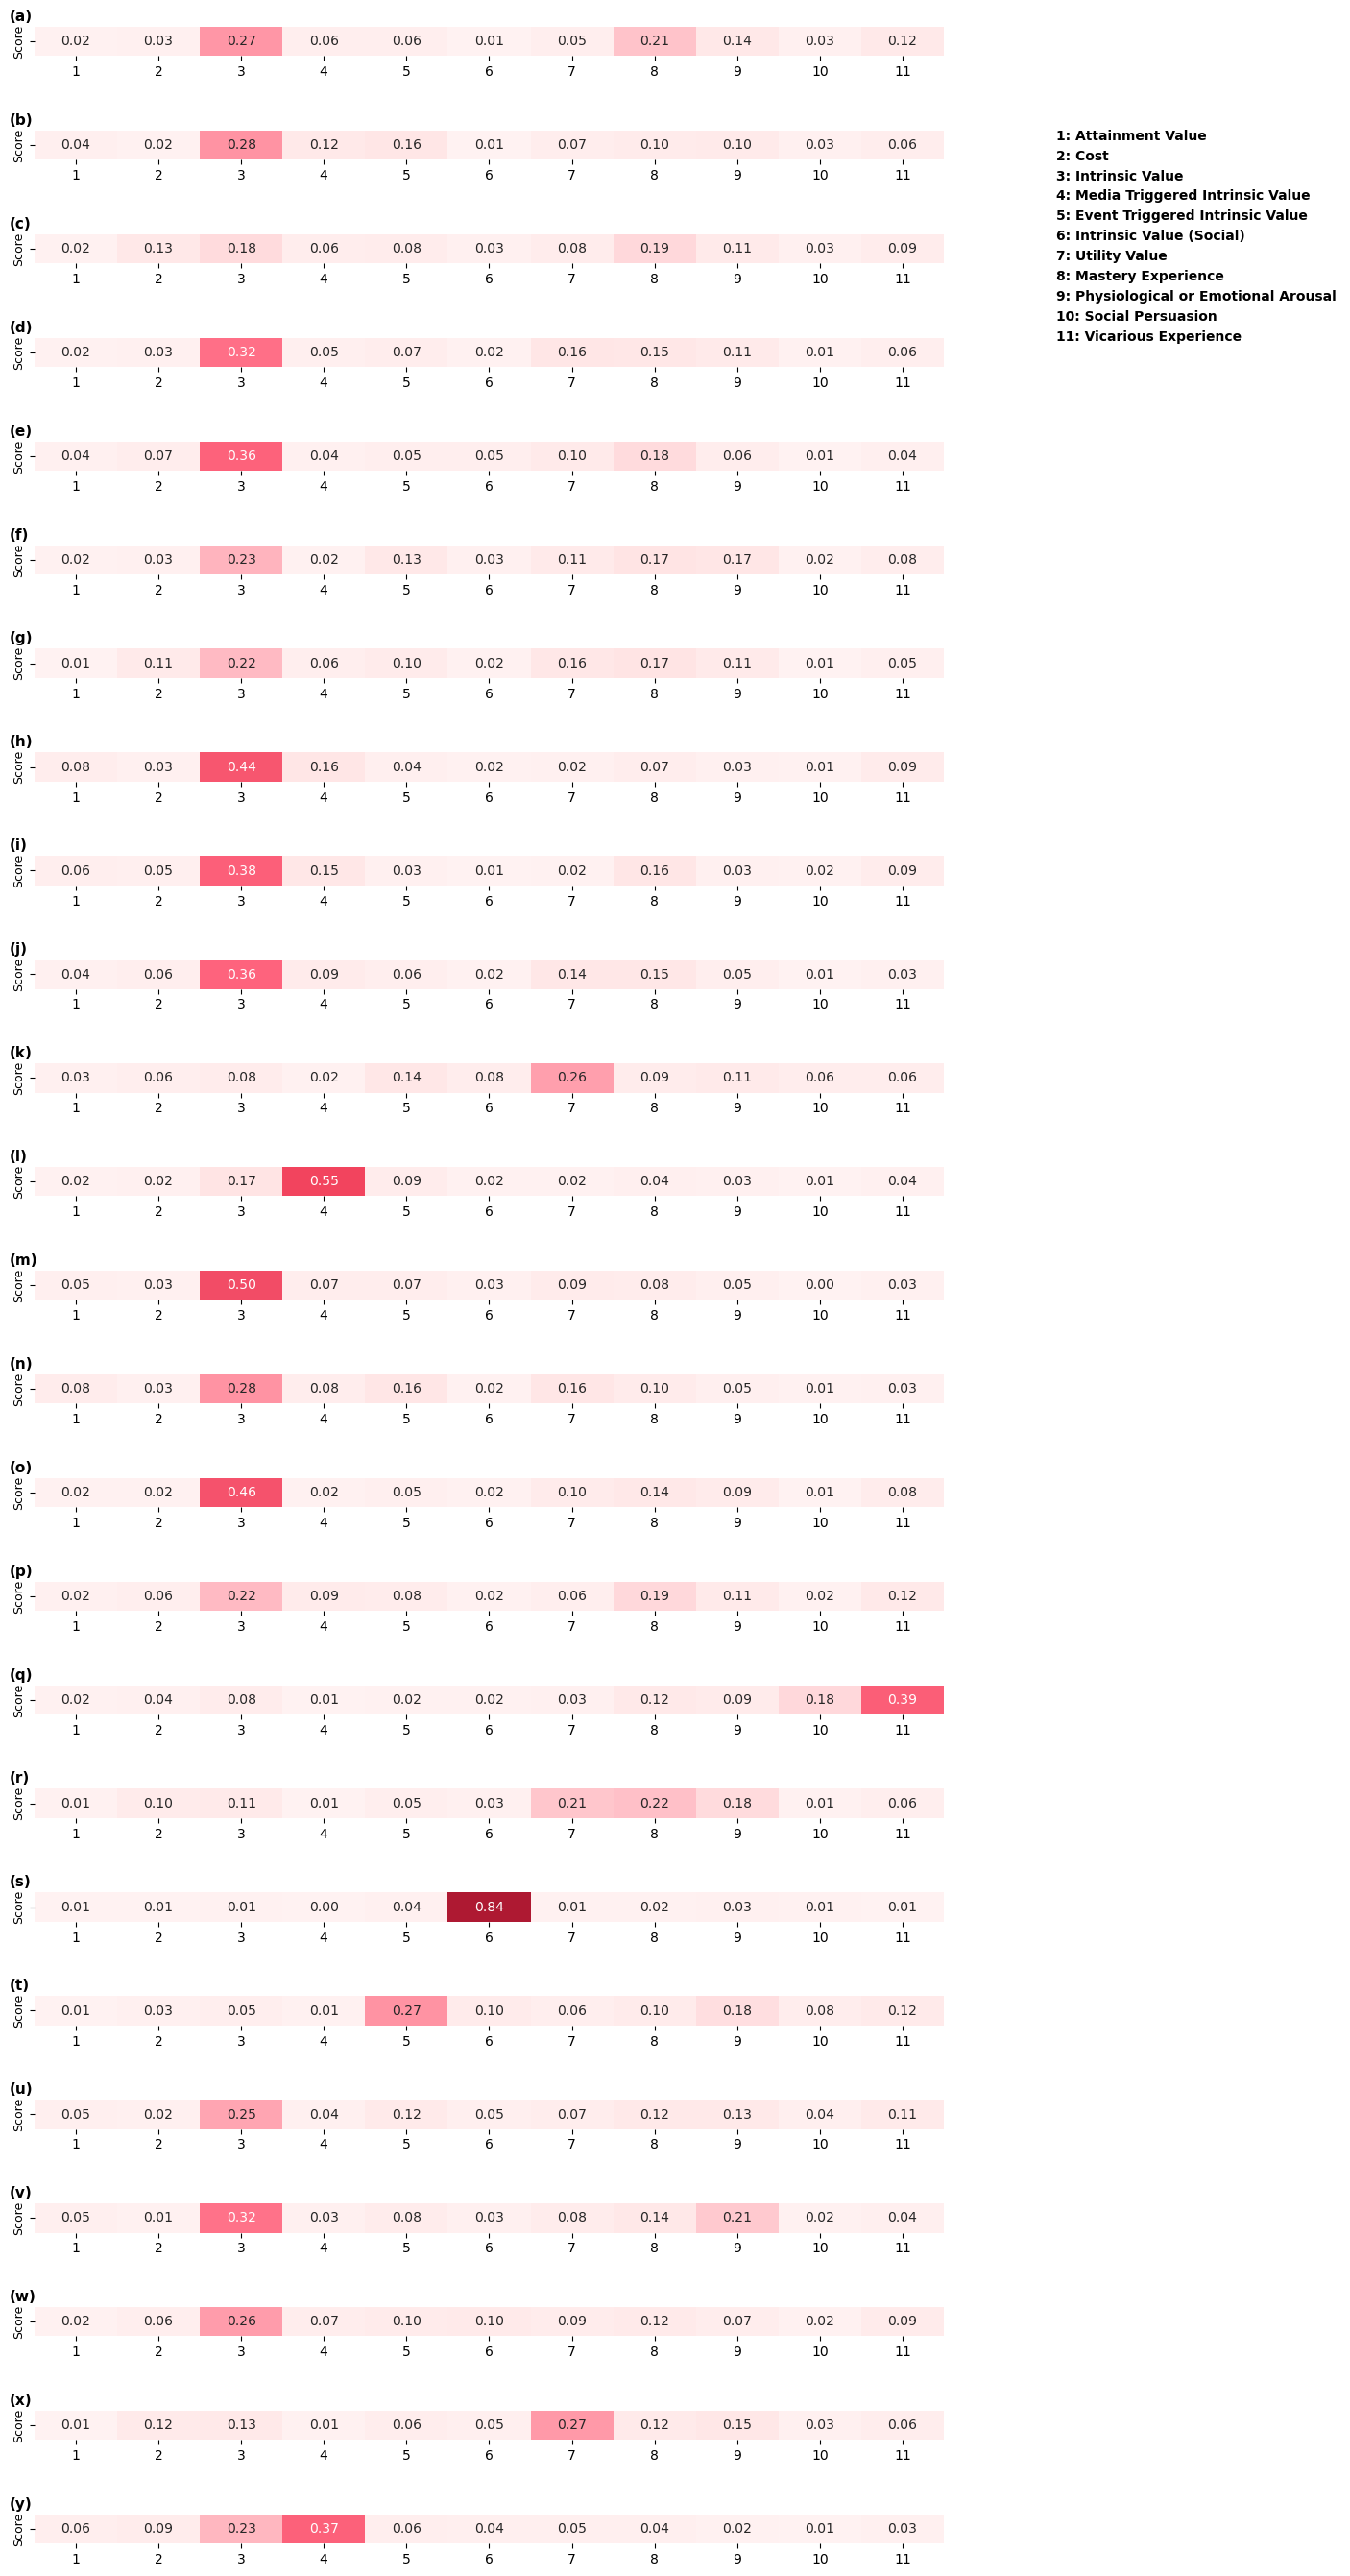

In [101]:
plot_heatmap(list(range(500,525)), 30, 'cosine', 'exponential', category_names)

### Pie Chart

In [ ]:
alpha = 10
metric = 'cosine'
scaling = 'exponential'

In [ ]:
scores = embedding_score(text_embeddings, centroid_embeddings, alpha, metric, scaling)
aggregate=np.sum(scores, axis=0)

plt.pie(aggregate, labels=category_names, autopct="%1.1f%%")
plt.show()